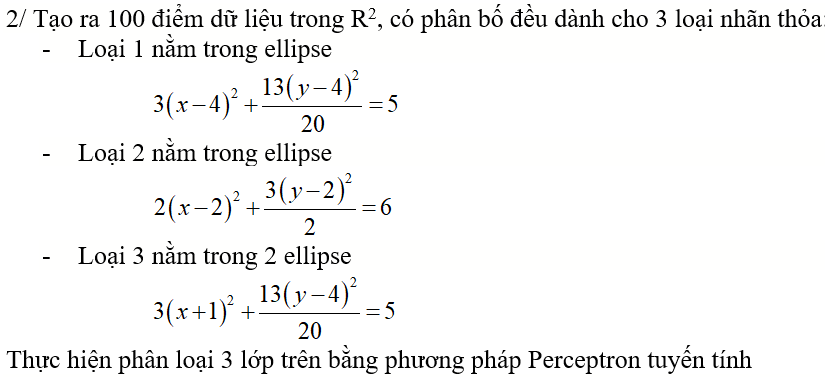

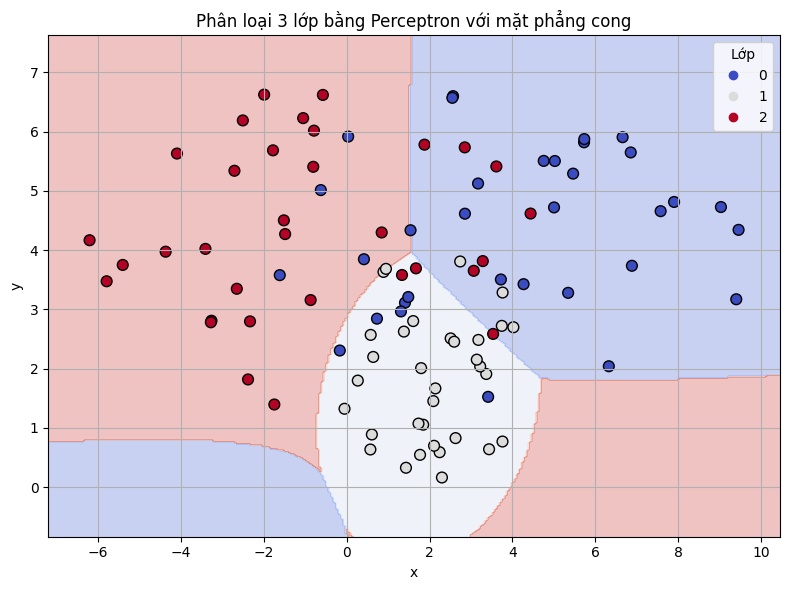

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron

# Hàm tạo điểm trong ellipse (tên hàm ngắn hơn)
def ellipse_points(a, b, x0, y0, n):
    t = 2 * np.pi * np.random.rand(n)
    r = np.sqrt(np.random.rand(n))  # phân phối đều trong ellipse
    x = a * r * np.cos(t) + x0
    y = b * r * np.sin(t) + y0
    return np.vstack((x, y)).T

# Hàm kernel phi tuyến
def nonlinear_kernel(X):
    # Thêm các đặc trưng phi tuyến vào input
    return np.hstack([X, X[:, 0:1]**2, X[:, 1:2]**2, X[:, 0:1]*X[:, 1:2]])

# Số lượng điểm cho mỗi lớp
np.random.seed(42)
n_points = 100 // 3

# Lớp 1: (x-4)^2*3 + (y-4)^2*13 <= 100 -> a = sqrt(100/3), b = sqrt(100/13)
X1 = ellipse_points(np.sqrt(100/3), np.sqrt(100/13), 4, 4, n_points)
y1 = np.zeros(n_points)

# Lớp 2: (x-2)^2*2 + (y-2)^2*3 <= 12 -> a = sqrt(6), b = sqrt(4)
X2 = ellipse_points(np.sqrt(6), np.sqrt(4), 2, 2, n_points)
y2 = np.ones(n_points)

# Lớp 3: (x+1)^2*3 + (y-4)^2*13 <= 100 -> a = sqrt(100/3), b = sqrt(100/13)
X3 = ellipse_points(np.sqrt(100/3), np.sqrt(100/13), -1, 4, n_points)
y3 = np.full(n_points, 2)

# Gộp dữ liệu
X = np.vstack((X1, X2, X3))
y = np.concatenate((y1, y2, y3))

# Áp dụng kernel phi tuyến vào dữ liệu
X_transformed = nonlinear_kernel(X)

# Huấn luyện Perceptron với dữ liệu đã được biến đổi
clf = Perceptron(max_iter=1000, tol=1e-3)
clf.fit(X_transformed, y)

# Vẽ vùng phân loại
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
Z = clf.predict(nonlinear_kernel(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

# Vẽ vùng phân loại và điểm dữ liệu
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')  # Vẽ vùng phân loại
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k', s=60)
plt.title("Phân loại 3 lớp bằng Perceptron với mặt phẳng cong")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Lớp")
plt.tight_layout()
plt.show()
